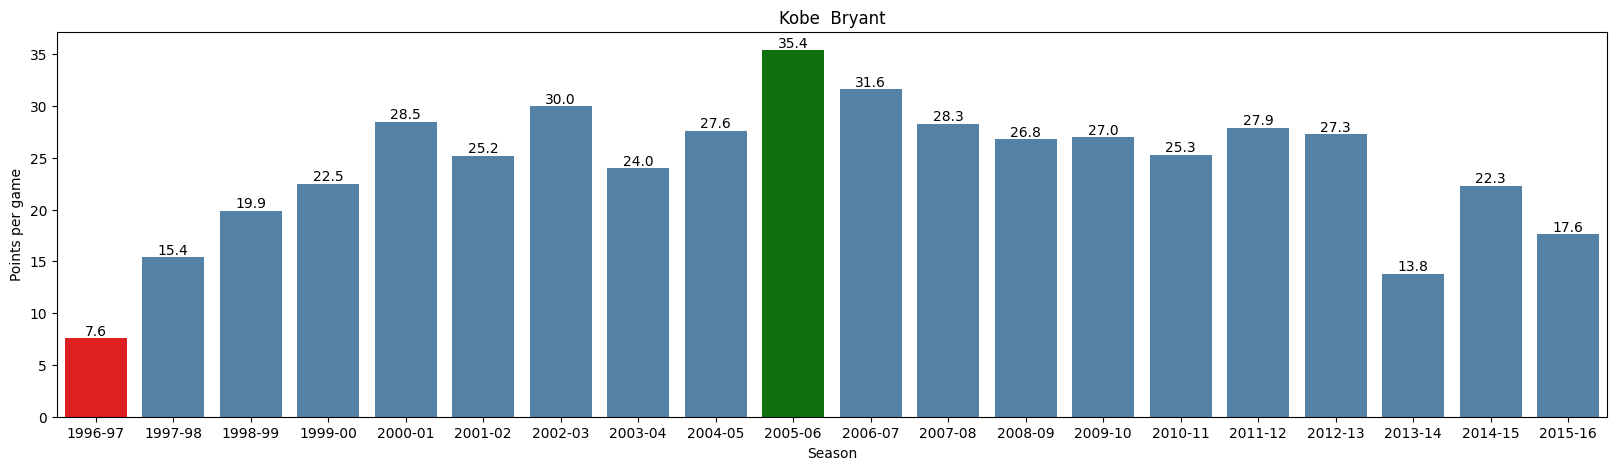

In [334]:
### Manual plot
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from statsmodels.formula.api import ols

nba_set = pd.read_csv("nba_players.csv")

###Reducing the scope of the dataset
nba_short = nba_set[["team_abbreviation","season","player_name","age","pts","reb","ast"]].sort_values(["team_abbreviation","player_name","season"])
kobe = nba_short[nba_short["player_name"].str.contains("kobe",case=False,na=False)]

###Max and min seasons for the plot
max_val = kobe["pts"].max()
min_val = kobe["pts"].min()
color_map = {}
for season, pts in zip(kobe["season"], kobe["pts"]):
    if pts == max_val:
        color_map[season] = "green"     # max
    elif pts == min_val:
        color_map[season] = "red"       # min
    else:
        color_map[season] = "steelblue" # other seasons
###plot
plt.figure(figsize=(20, 5))
plot_kobe = sns.barplot(data=kobe,x="season",y="pts",hue="season",palette=color_map,legend=False)
for container in plot_kobe.containers:
    plot_kobe.bar_label(container, fmt="%.1f", label_type="edge")
plt.xlabel("Season")
#plt.xticks(rotation=90)
plt.ylabel("Points per game")
plt.title("Kobe  Bryant")
plt.show()

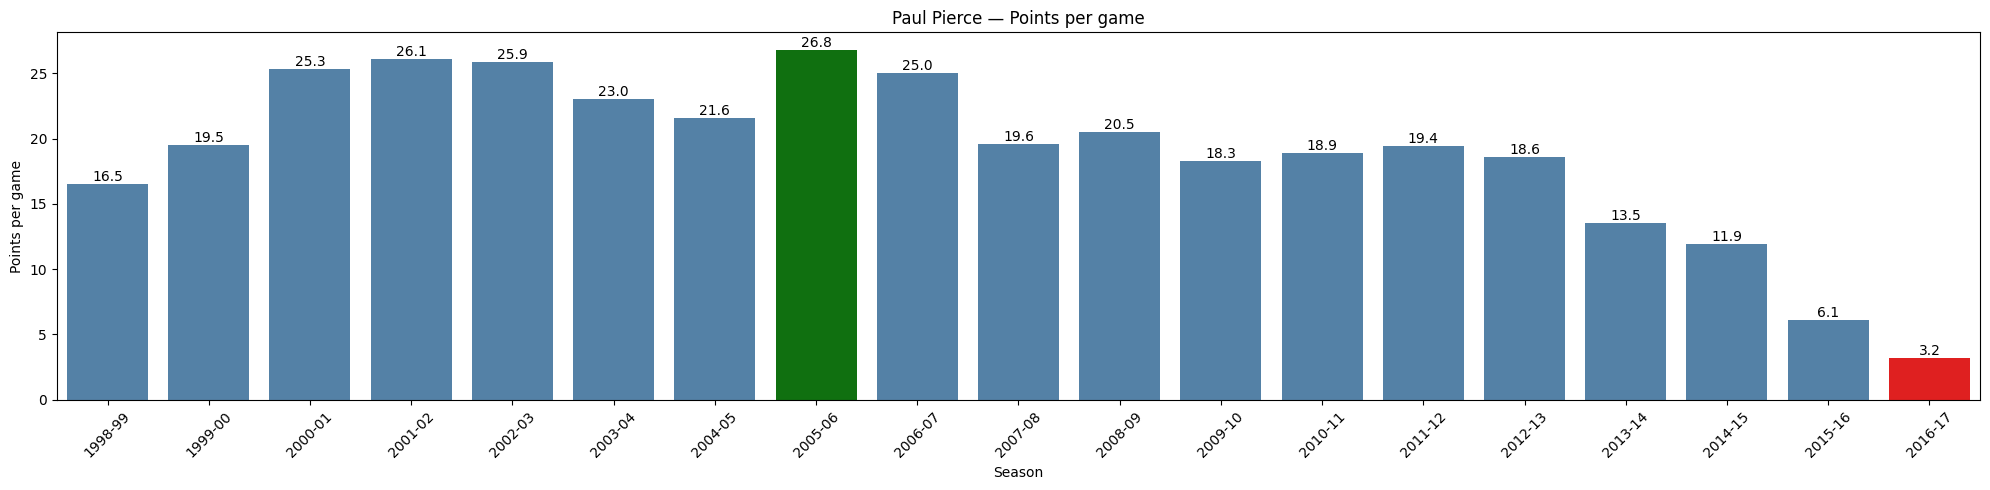

In [339]:
###Automated plot for points (formula)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from statsmodels.formula.api import ols

nba_set = pd.read_csv("nba_players.csv")

nba_short = nba_set[["team_abbreviation","season","player_name","age","pts","reb","ast"]].sort_values(["season"])

def plot_player_seasons(df, player_query, metric="pts"):
    ###Filtering by player_name (it doesn't have  to be an exact match, returns ths most popular)
    mask = df["player_name"].str.contains(player_query, case=False, na=False)
    sub = df.loc[mask, ["season", "player_name", metric]].copy()

    if sub.empty:
        print(f"Didn't find info for: {player_query!r}")
        return

    player_name = sub["player_name"].mode().iat[0]

    ###Group by season
    sub = sub.groupby("season", as_index=False)[metric].mean()

    ###Dynamic colors for max and min seasons
    max_val = sub[metric].max()
    min_val = sub[metric].min()
    palette = {
        s: ("green" if v == max_val else "red" if v == min_val else "steelblue")
        for s, v in zip(sub["season"], sub[metric])
    }

    ###Plot
    plt.figure(figsize=(20, 5))
    ax = sns.barplot(
        data=sub.sort_values("season"),
        x="season", y=metric,
        hue="season", palette=palette, legend=False
    )

    ###Labels
    for c in ax.containers:
        ax.bar_label(c, fmt="%.1f", label_type="edge")

    ax.set_xlabel("Season")
    ax.set_ylabel({"pts":"Points per game","reb":"Rebounds","ast":"Assists"}.get(metric, metric))
    ax.set_title(f"{player_name} — {ax.get_ylabel()}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


plot_player_seasons(nba_short, "Paul Pierce", metric="pts")


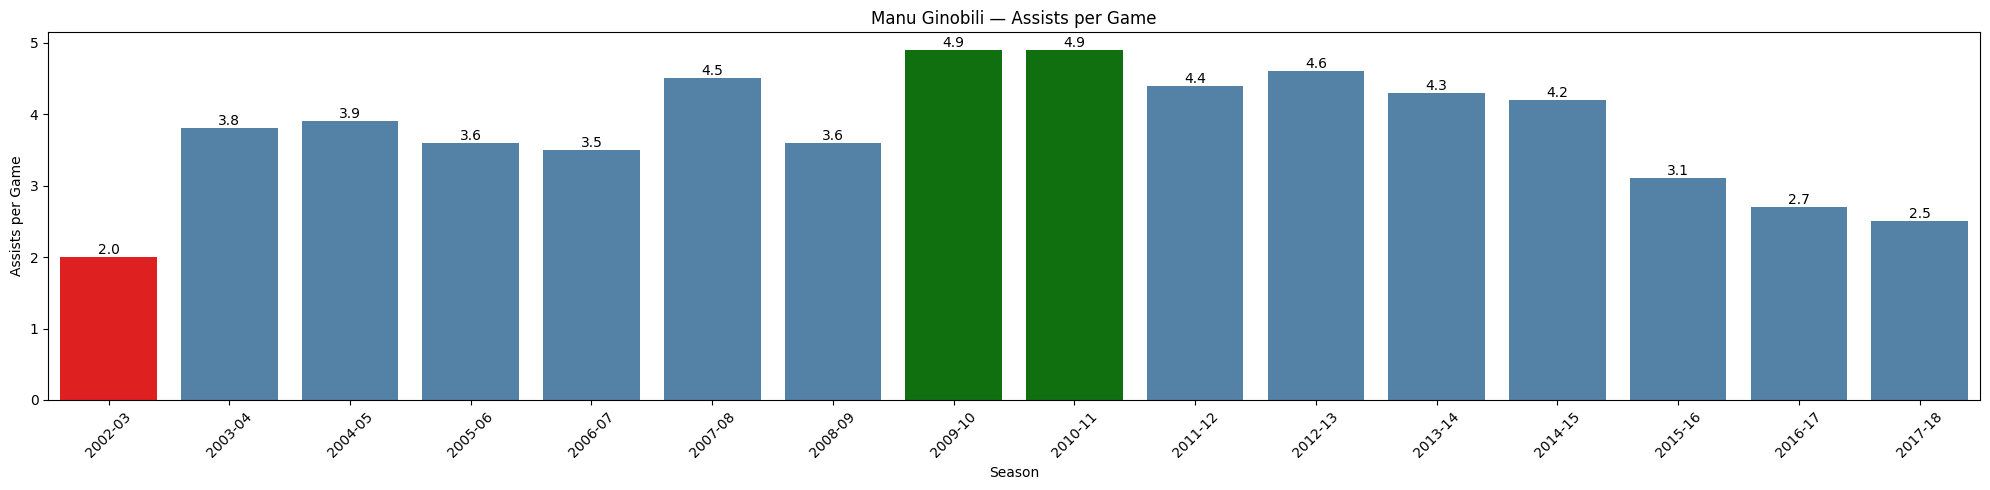

In [350]:
###Automated general formula
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

nba_set = pd.read_csv("nba_players.csv")
nba_short = nba_set[["team_abbreviation","season","player_name","age","pts","reb","ast"]].sort_values(["season"])

def plot_player_seasons(df, player_query, metric):
    
    ###Filter by name
    mask = df["player_name"].str.contains(player_query, case=False, na=False)
    sub = df.loc[mask, ["season", "player_name", metric]].copy()

    if sub.empty:
        print(f"Didn't find info for '{player_query}'.")
        return

    player_name = sub["player_name"].mode().iat[0]

    ###Group by season
    sub = sub.groupby("season", as_index=False)[metric].mean()

    ###Dynamic colors for max and min seasons
    max_val = sub[metric].max()
    min_val = sub[metric].min()
    palette = {
        s: "green" if v == max_val else "red" if v == min_val else "steelblue"
        for s, v in zip(sub["season"], sub[metric])
    }

    ###Plot
    plt.figure(figsize=(20, 5))
    ax = sns.barplot(
        data=sub.sort_values("season"),
        x="season",
        y=metric,
        hue="season",
        palette=palette,
        legend=False
    )

    ###Labels
    for container in ax.containers:
        ax.bar_label(container, fmt="%.1f", label_type="edge")


    metric_labels = {"pts": "Points per Game", "reb": "Rebounds per Game", "ast": "Assists per Game"}
    ax.set_xlabel("Season")
    ax.set_ylabel(metric_labels.get(metric, metric))
    ax.set_title(f"{player_name} — {metric_labels.get(metric, metric)}")

    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


plot_player_seasons(nba_short, "manu gino", metric="ast")
#pts
#reb
#ast

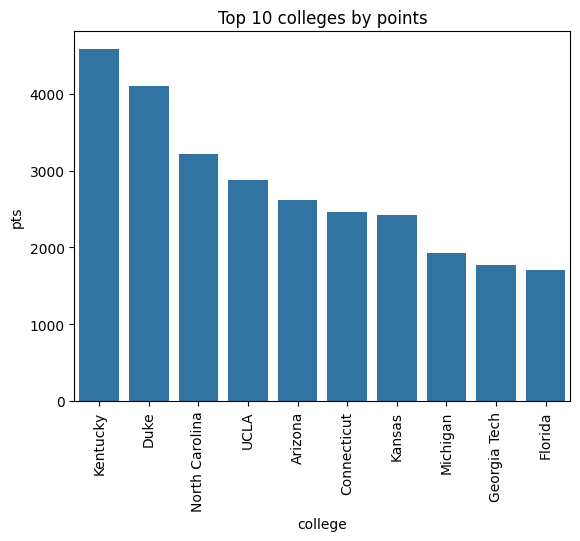

In [352]:
###College analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from statsmodels.formula.api import ols

nba_set = pd.read_csv("nba_players.csv")

###Removing nulls and players who didn't go to college
nba_filtered = nba_set[
    (nba_set["college"].notna()) & (nba_set["college"] != "None")
]

###Plot
Top_colleges = pd.DataFrame(nba_filtered.groupby("college").sum("pts").sort_values("pts",ascending=False)["pts"].head(10))
Top_colleges["college"] = Top_colleges.index

sns.barplot(data=Top_colleges,x="college",y="pts")
plt.xticks(rotation=90)
plt.title("Top 10 colleges by points")
plt.show()


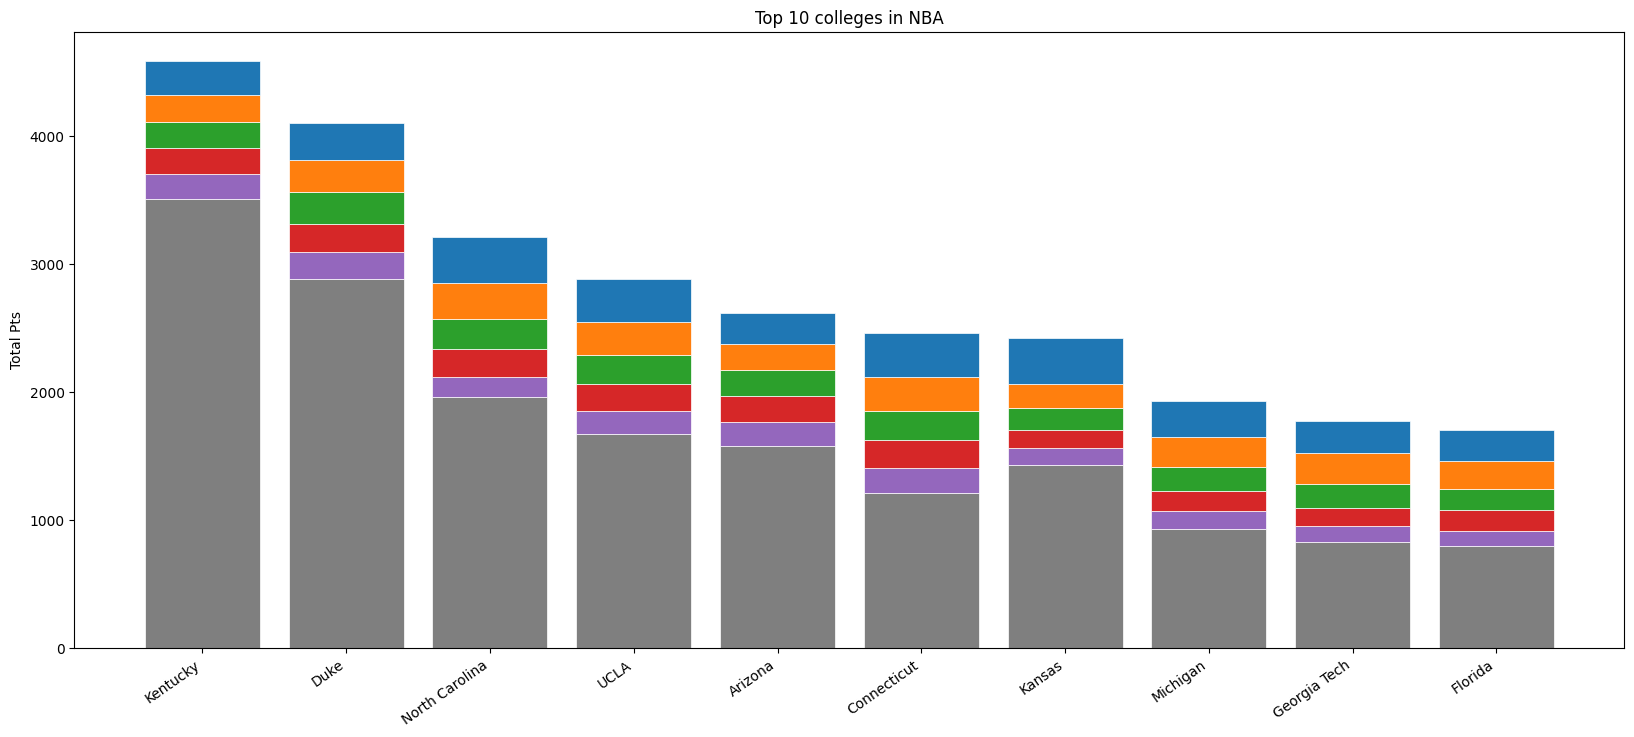

In [353]:
###College analysis stacked bars
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import seaborn as sns
from sklearn import datasets
from statsmodels.formula.api import ols

nba_set = pd.read_csv("nba_players.csv")
###Removing nulls and players who didn't go to college
df = nba_set[(nba_set["college"].notna()) & (nba_set["college"] != "None")].copy()

player_col = "player_name" 

###Grouping
by_player_college = (
    df.groupby(["college", player_col], dropna=False)["pts"]
      .sum()
      .reset_index()
)

college_totals = (
    by_player_college.groupby("college")["pts"].sum()
      .sort_values(ascending=False)
)
top10_colleges = college_totals.head(10).index.tolist()

g = by_player_college[by_player_college["college"].isin(top10_colleges)].copy()
g["rank_in_college"] = g.groupby("college")["pts"].rank(method="first", ascending=False)

###Segments: top5 + others
segments = {}
top1_name = {}

for col in top10_colleges:
    sub = g[g["college"] == col].sort_values("pts", ascending=False)
    top5 = sub.head(5)
    segs = {int(i+1): top5.iloc[i]["pts"] for i in range(len(top5))}
    segs["Others"] = college_totals.loc[col] - top5["pts"].sum()
    segments[col] = segs
    top1_name[col] = top5.iloc[0][player_col] if len(top5) else "—"

###Colors and ranking
rank_order = ["Others", 5, 4, 3, 2, 1] 
rank_colors = {
    1: "#1f77b4",
    2: "#ff7f0e",
    3: "#2ca02c",
    4: "#d62728",
    5: "#9467bd",
    "Others": "#7f7f7f"
}

###Plot
fig, ax = plt.subplots(figsize=(20, 8))  
x = np.arange(len(top10_colleges))
bottom = np.zeros(len(top10_colleges))

### Stacked bars
for r in rank_order:
    heights = [segments[col].get(r, 0) for col in top10_colleges]
    ax.bar(
        x, heights, bottom=bottom,
        label=f"Rank {r}" if r != "Others" else "Others",
        color=rank_colors[r], edgecolor="white", linewidth=0.5
    )
    bottom = bottom + np.array(heights)

# Axis and titles
ax.set_xticks(x)
ax.set_xticklabels(top10_colleges, rotation=35, ha="right")
ax.set_ylabel("Total Pts")
ax.set_title("Top 10 colleges in NBA")



###Legends
legend1 = ax.legend(
    title="Rank per college",
    loc="center left",
    bbox_to_anchor=(1.1, 0.5)
)
ax.add_artist(legend1)


handles_top1 = [
    Line2D([0], [0], marker="s", linestyle="", markersize=8,
           markerfacecolor=rank_colors[1], markeredgecolor="none",
           label=f"{col}: {top1_name[col]}")
    for col in top10_colleges
]
legend2 = ax.legend(
    handles=handles_top1,
    title="Top scorer por college",
    loc="center left",
    bbox_to_anchor=(1.38, 0.5)
)
ax.add_artist(legend2)


plt.show()

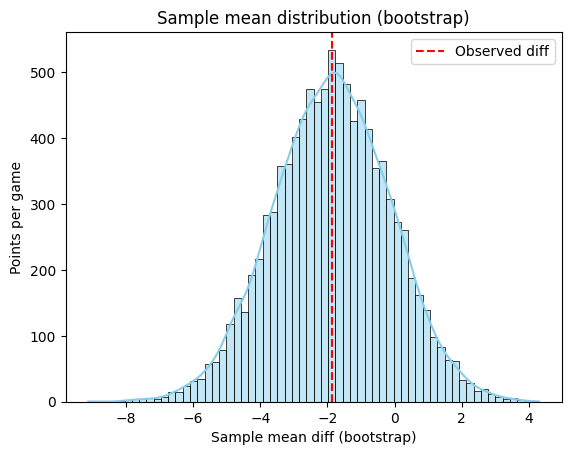

IC 95% bootstrap: [-5.283, 1.504]
t = -0.282, p-value = 0.7792


In [312]:
### Kobe vs Iverson

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import seaborn as sns
from sklearn import datasets
from statsmodels.formula.api import ols

nba_set = pd.read_csv("nba_players.csv")

#Are Allen Iverson and Kobe Bryant ppg any different?
ho_set = nba_set[nba_set["player_name"].isin(["Kobe Bryant","Allen Iverson"])].sort_values(["season","player_name"])

ho_pivot = ho_set.pivot(index="season", columns="player_name", values="pts")

ho_pivot["Allen Iverson"] = ho_pivot["Allen Iverson"].fillna(ho_pivot["Allen Iverson"].mean())

#sns.lineplot(data=ho_pivot,x=ho_pivot.index,y="Allen Iverson")
#sns.histplot(data=ho_pivot,x="Kobe Bryant")
#plt.xlabel("Season")
#plt.xticks(rotation=90)
#plt.show()

###Statistical Analysis
obs_diff = np.mean(ho_pivot["Kobe Bryant"]) - np.mean(ho_pivot["Allen Iverson"])

###Bootstrapping

boot_diffs = []

for _ in range(10000):
    kobe_sample = np.random.choice(ho_pivot["Kobe Bryant"], size=len(ho_pivot["Kobe Bryant"]), replace=True)
    iverson_sample = np.random.choice(ho_pivot["Allen Iverson"], size=len(ho_pivot["Allen Iverson"]), replace=True)
    boot_diffs.append(np.mean(kobe_sample) - np.mean(iverson_sample))

boot_diffs = np.array(boot_diffs)

###Bootstrapping visualization
sns.histplot(boot_diffs, kde=True, color="skyblue")
plt.axvline(obs_diff, color="red", linestyle="--", label="Observed diff")
plt.xlabel("Sample mean diff (bootstrap)")
plt.ylabel("Points per game")
plt.title("Sample mean distribution (bootstrap)")
plt.legend()
plt.show()

###Confidence interval
ic_low, ic_high = np.percentile(boot_diffs, [2.5, 97.5])
print(f"IC 95% bootstrap: [{ic_low:.3f}, {ic_high:.3f}]")

###t-test

from scipy.stats import ttest_ind

t_stat, p_value = ttest_ind(kobe_sample, iverson_sample, equal_var=False)  # Welch’s test
print(f"t = {t_stat:.3f}, p-value = {p_value:.4f}")


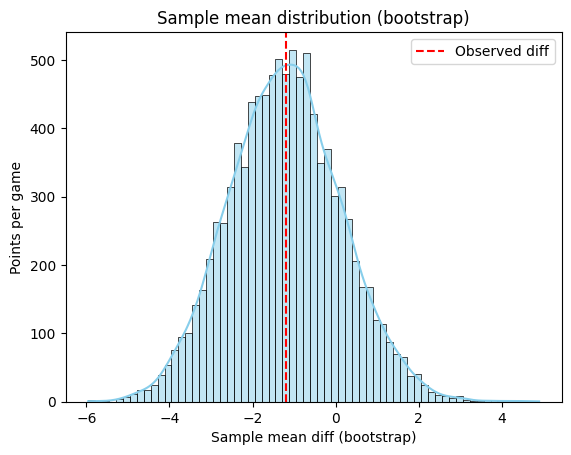

IC 95% bootstrap: [-3.789, 1.489]
t = -1.066, p-value = 0.2941


In [333]:
### Pau Gasol and Tony Parker

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import seaborn as sns
from sklearn import datasets
from statsmodels.formula.api import ols

nba_set = pd.read_csv("nba_players.csv")

#Are Allen Iverson and Kobe Bryant ppg any different?
ho_set = nba_set[nba_set["player_name"].isin(["Pau Gasol","Tony Parker"])].sort_values(["season","player_name"])

ho_pivot = ho_set.pivot(index="season", columns="player_name", values="pts")

# sns.lineplot(data=ho_pivot,x=ho_pivot.index,y="Pau Gasol")
# #sns.histplot(data=ho_pivot,x="Pau Gasol")
# plt.xlabel("Season")
# plt.xticks(rotation=90)
# plt.show()

###Statistical Analysis
obs_diff = np.mean(ho_pivot["Tony Parker"]) - np.mean(ho_pivot["Pau Gasol"])

###Bootstrapping

boot_diffs = []

for _ in range(10000):
    tony_sample = np.random.choice(ho_pivot["Tony Parker"], size=len(ho_pivot["Tony Parker"]), replace=True)
    pau_sample = np.random.choice(ho_pivot["Pau Gasol"], size=len(ho_pivot["Pau Gasol"]), replace=True)
    boot_diffs.append(np.mean(tony_sample) - np.mean(pau_sample))

boot_diffs = np.array(boot_diffs)

###Bootstrapping visualization
sns.histplot(boot_diffs, kde=True, color="skyblue")
plt.axvline(obs_diff, color="red", linestyle="--", label="Observed diff")
plt.xlabel("Sample mean diff (bootstrap)")
plt.ylabel("Points per game")
plt.title("Sample mean distribution (bootstrap)")
plt.legend()
plt.show()

###Confidence interval
ic_low, ic_high = np.percentile(boot_diffs, [2.5, 97.5])
print(f"IC 95% bootstrap: [{ic_low:.3f}, {ic_high:.3f}]")

###t-test

from scipy.stats import ttest_ind

t_stat, p_value = ttest_ind(tony_sample, pau_sample, equal_var=False)  # Welch’s test
print(f"t = {t_stat:.3f}, p-value = {p_value:.4f}")

